# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
Currently, the Smartcab does not move at all. It appears to only gain and lose points, respectively, for (correctly) idling at a red light and (incorrectly) idling at a green. It receives a positive reward for idling at a red and a negative reward for idling at a green. Assumedly the Smartcab would receive other positive rewards for taking safe actions and arriving at it's destination (and negative rewards for deviating from these goals) if it were to actually move. The rewards appear to be partially randomized (some noise added) or otherwise related to road conditions that are not explicitly stated in the visualization, because the reward values tend to jump around even when the Smartcab is taking the same action in the same state (idling) in the same state (red or green light) as it was in the prior step. 

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 

**agent.py flags:**
- num_dummies affects the number of other agents (cars) in the simulated environment. Increasing the number of dummy agents should increase the proportion of the time that the agent encounters a state where it must account for the movement of other cars on the road ('left', 'right' and 'oncoming' in the input set created in build_state). We'll want to set num_dummies to a value that ensures that the our agent commonly encounters other vehicles at intersections, but not every intersection, so that it has a chance to learn the best action both in the presence and absence of other cars (avoid accidents, but move efficiently when it is safe to do so).
- epsilon controls the rate at which the agent chooses a random action instead of the action with the highest Q-value in the current state. Epsilon is essential to learning Q-values for a broad set of actions. Epsilom is also one of the values that controls how many training trials the program will run through before moving to testing. We'll decrease epsilon using some function each time we begin a training trial (via the reset() function) and begin testing when a certain threshold (tolerance) is passed. Together, epsilon and tolerance provide us with a flexible way to control when we want to end training and move to testing. 
- alpha is our learning rate, which controls the rate at which our Q-learning process updates the Q-values associated with each state-action pair. Our Q-learning update function, assuming we use no discount factor and do not consider future rewards, is: Q_prior = Q_prior + alpha * (Reward  - Q_prior). Alpha essentially effects the weight we give the old Q value and the new estimate, Reward, in the update process. If alpha = 1, we replace the existing Q value, Q_prior, with the Reward for the given state-action pair. If alpha = .5, the updated Q-value is the mean of Q_prior and Reward. If alpha = .1, we will change Q_prior by 10% of the difference between Q_prior and Reward.

**environment.py:**
When the agent performs an action, the act() function is called.

**simulator.py:**
render_text() controls the messages that print to the terminal as a simulation is run, and render() controls the information displayed in the Ipython GUI. 

**planner.py:**
next_waypoint() considers the East-West dimension of the Manhattan distance to destination first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


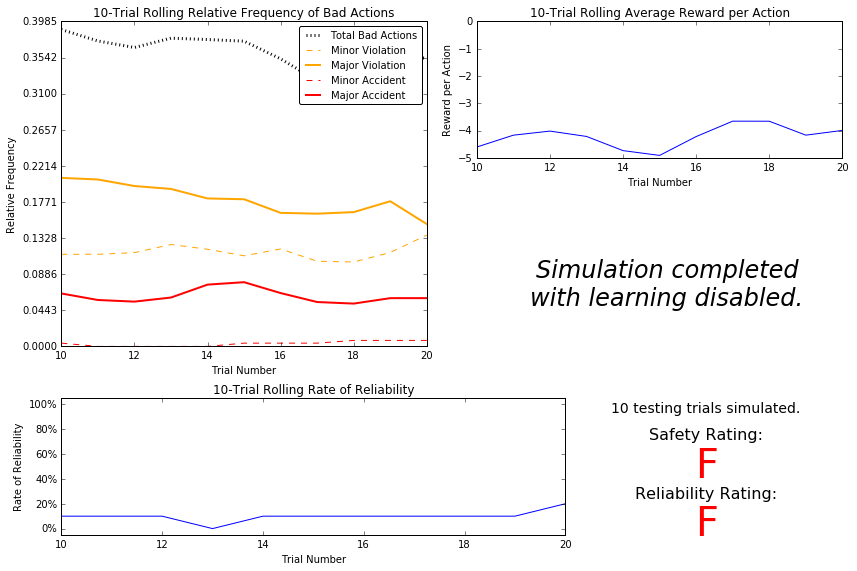

In [13]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The chart in the upper-left shows that the total rate of bad actions is around 35%. Approximately 6 or 7% of actions result in a major or minor accident (indicated by the bold red and dashed red lines, respectively).The overall reliability rate (how often the cab reaches its destination) sits below 20%, as shown by the chart on the lower-left, which makes sense for a car driving randomly. 

The chart in the upper-right shows the average reward per action (rolling avg). The average reward sit between -4 and -5. The act() function gives negative rewards for any violation, implements a penalty system based on the time remaining, and gives the greatest positive rewards for moving towards the destination or correctly idling at a red. Negative average rewards make sense for a Smartcab that commits violations 35% of the time and fails to reach its destination 80% of the time. 

If we calculate expected rewards just based on the violations we can identify in the upper-left chart .18\*(-10)+.13\*(-5)+.06\*(-40)+.01\*(-20) = -5. So based on violations alone, we expect an average of -5 reward per action. Adding in the additional penalties for decreasing time remaining and the occasional positive reward for randomly choosing the right action, -4 to -5 seems like a reasonable range of avg rewards per action.

There are some random fluctuations in violations, reliability and rewards as the simulation goes on (seen in all three charts) but the overall trend for each metric is roughly flat, which we would expect from a random process. The Smartcab is not supposed to be learning anything yet or evaluating expected Q-values when choosing a step, so we would expect no improvement oer independent trials. 

According to the testing grades on the lower right, this Smartcab fails the testing trials on measures of both safety and reliability, which seems proper. It should not be surprising that a cab that acts randomly has a 35% violation rate and 20% reliability rate, and should not be carrying passengers.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

'Waypoint' is absolutely necessary for efficiency. Without the 'waypoint' feature as a part of the state, the Smartcab has no way to reinforce the decision to move towards its destination. It could learn to drive safely but not efficiently. 

'Light' is absolutely necessary to avoid violations. Without the 'light' input, the Smartcab is unable to distinguish between states with a red and green light and will tend to blindly rack up violations for running reds or idling at greens, or may start taking unnecessary right turns whenever there is no traffic (since a right turn is the only action that can yield positive rewards regardless of the light color). A right on a green is always safe, and a right on a red is safe when there is no forward-moving traffic from the left, so the agent will always learn a positive Q-value for a right turn with no traffic. Even when there is no cross-traffic, all other actions (idling, forward, or left) will result in a violation on a either a red or a green, so absent light information the agent is likely to learn that these actions produce negative rewards and choose to take a right (when it is safe) regardless of the 'waypoint' direction.   

'Left' is necessary to teach the Smartcab when it can safely take a right turn at a red light without getting hit by another vehicle coming from the left. 

'Oncoming' and 'right' may not be entirely necessary. While these features are important for avoiding accidents in certain circumstances (Smartcab wants to go forward or left in a way that would bring it into the path a vehicle coming from the right or the oncoming direction), each of these dangerous situations only occurs if the Smartcab has already run a red light, due to the way the rewards are coded. For example, 'oncoming' does not matter when taking a left on a green because the simulation assumes the cab waits for oncoming traffic to clear. Since we do not want to the Smartcab to run red lights anyways, I do not think it matters so much that the Smartcab cannot meaningfully distinguish between the consequences of just running a red (small penalty, but still enough to outstrip any reward and make idling a better choice) and running a red with cross-traffic (big penalty). Either way, it should learn that running a red light results in a significant penalties (of varying degrees) and avoid doing so. 

'Deadline' is also likely not to be necessary. The Smartcab should be making progress towards its destination at all times, regardless of  the time remaining. Whether there are 20 moves remaining or just one, the best action should be either proceeding towards the destination or idling where it would be unsafe to proceed. Moreover, adding 'deadline' to our states likely creates too many possible states for the Smartcab to learn effectively. Imagine for example that the learner has seen state A but not state B and that A and B are identical except that deadline B = deadline A - 1. We may surmise that the Smartcab should take the same action in states A and B, because they are so similar, but our Q-learning implementation doesn't know this; it will treat states A and B as being completely different, because they have different 'deadline' features. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
There are 24 (3 waypoint directions, 2 lights, 4 values of 'left') possible states in our state space. (Combined with four possible actions at each state, the size of the state-action space is 96.) Relative to the number of actions the agent is expected to make over 20 or more trials, this is not a large number of possible states. Keeping the state space relatively small is part of the reason that I chose to exclude 'right', 'oncoming', and 'deadline' from the state space. 

Currently we allow for 20 training trials and within each trial we have 5\*(distance to destination) actions. Different states will be more or less common depending, e.g., on the density of other agents in the grid, but the agent should experience each state on average 5\*(avg distance to waypoint) times.

Thus, given a large enough grid, the driving agent should be capable of learning a policy for each of the 24 states in a reasonable number of trials, though it may not have enough trial time to update Q-values for every state-action pair. 

Note that this construction of 'state' assumes we are not allowed to even create a feature such as inputs['left'] == 'forward', 
which would cut down our feature space by half without loss of information.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

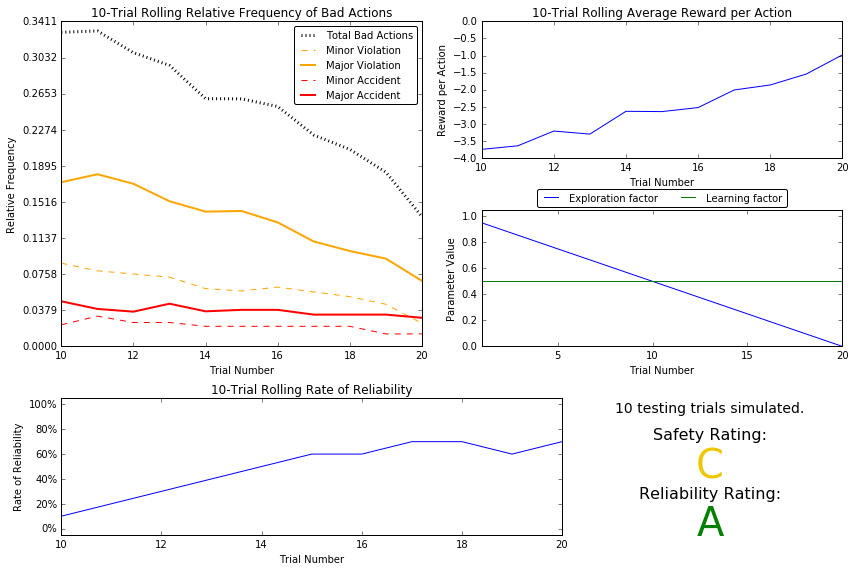

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

In [4]:
f = open('logs\\sim_default-learning.txt','r')
message = f.read()
print(message)
f.close()

/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('left', 'green', 'forward')
 -- forward : 0.44
 -- right : 0.33
 -- None : -3.41
 -- left : 1.63

('right', 'green', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : -2.01
 -- left : -0.11

('forward', 'green', 'left')
 -- forward : 0.00
 -- right : 0.32
 -- None : -2.00
 -- left : 1.07

('left', 'green', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : -2.76
 -- left : 1.65

('right', 'red', 'forward')
 -- forward : -20.34
 -- right : -18.89
 -- None : 0.56
 -- left : -29.96

('forward', 'green', None)
 -- forward : 0.00
 -- right : 0.44
 -- None : -4.84
 -- left : 0.53

('forward', 'red', 'forward')
 -- forward : 0.00
 -- right : -15.20
 -- None : 1.03
 -- left : -19.98

('forward', 'red', 'right')
 -- forward : 0.00
 -- right : 0.22
 -- None : 0.00
 -- left : 0.00

('left', 'red', 'left')
 -- forward : -16.38
 -- right : 0.46
 -- None : 2.11
 -

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
Relative to the basic (random) agent, the Q-learning agent shows significant improvements in safety over the course of the training trials (upper-left chart). The number of bad actions decreases, and the average reward earned per action increases, as the agent goes through more training trials. The agent achieves a C grade in safety on the test trials, indicating "at least one major traffic violation" but no accidents on average.

The Q-learning agent also appears to be making significant improvements in reliability (lower left chart), hitting ~70% reliability over the last 10 trials, and earning an A on reliability from the test trials (indicating ~90% test reliability). The agent was also trending towards net positive average rewards near the end of the training trials (upper-right chart). The overall safety rating (upper-left chart and lower-right grade) and reliability (lower-left and lower-right grade) are much better than the initial driving agent, though there were perhaps not enough training trials to reach A+ safety and reliability.

From a mere visual inspection of the Q-table, it is clear that the maximum Q-value in certain states does not accord with what we know to be the best action. E.g., at state (waypoint = 'forward', light = 'green', left = 'left'), where it should be safe to go forward, the agent will still prefer to turn left or right. An increase in the numer of training trials (via epsilon and threshold), more randomization of action choices (epsilon) or a change in the learning rate (alpha) may help the learning agent to better identify the best action in every state. 

The current implementation goes through 20 training trials, which makes sense given our epsilon decay function and epsilon-tolerance (we start at 1, decrement by .05 each trial, and end when epsilon < .05). The decay function is not represented in the parameters panel, but is instead hardcoded in the reset() function. 



-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

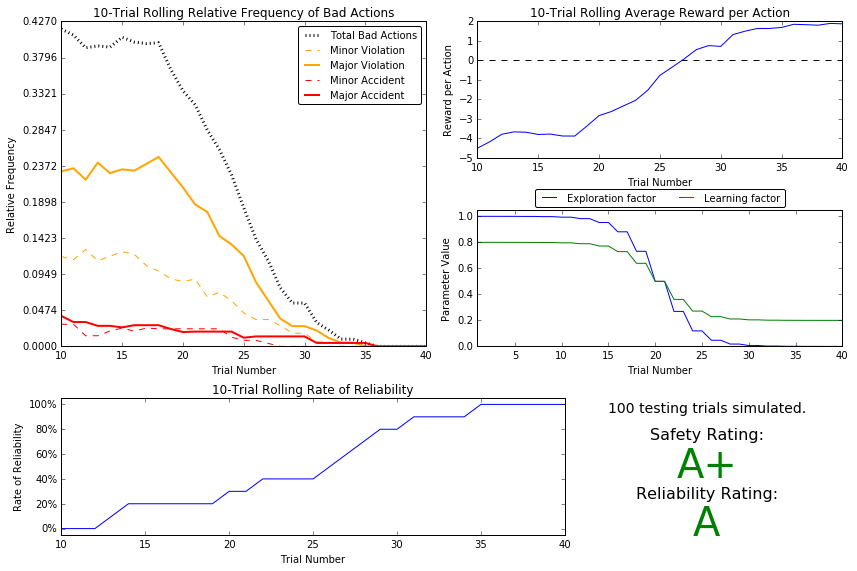

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
I used a decay function whereby epsilon = 1/(1+(e^(trial/2 - 10))). The epsilon tolerance is 0.0001, which results in ~40 training trials. This decay function causes epsilon to be close to 1 for the first 20 trials and close to 0 for the last 18 or so trials. I made this choice because, in this learning task, there is little reason to move the agent away from random actions when it is just beginning its training. Moving to a low epsilon too quickly may cause the Q-learning algorithm to settle too quickly on a particular action in a particular state. A greater degree of randomization ensures that the agent is likely to learn the expected rewards for nearly every state-action pair before acting upon the learned Q-values. In this instance it spends ~15-20 trials doing mostly learning and then quickly transitions to ~15-20 trials of mostly acting on its learnings. 

If we changed the x/2 in the epsilon decay function to x/3 or x/4, the total number of training trials would increase (to ~60 and ~80 respectively) and we may have a good chance of developing perfect policies. But in the spirit of decaying to tolerance at a reasonable rate (as mentioned in the instructions above), I chose to see what kind of performance the agent would achieve with a smaller number of trials and a decaying learning rate.  

I used a similar decay function for alpha, with a slight alteration to cap and floor alpha at .8 and .2 respectively. Alpha = 0.6/(1+(e^(trial/2 - 10))) + 0.2 I wanted the agent to learn quickly in early trials, which should be fine in this case because the rewards for a state-action pair are relatively consistent, especially for the large negative rewards for safety violations. Given that epsilon is also very high where alpha is high, I'm not overly concerned about the Q-learner "learning" too quickly, overestimating the value of a wrong action and getting stuck choosing that action in a given state. The randomness lent by keeping a high epsilon for ~20 trials should allow the agent to correct these mistakes by randomly encountering the better action choice (and quickly learning that it carries a higher reward). The learning rate then decreases as epsilon decreases, leveling out to the lower learning rate closer to 0.2 as the learner transitions to acting. I did want to ensure that the learning rate never went to 0, so that the learner could use the last ~15-20 training trials to confirm or disconfirm its policies through additional (albeit gradual) learning. 

This learner is a significant improvement on the default learner. The default learner had decent performance with just 20 trials, a lower starting learning rate and a relatively rapid linear epsilon decay. The optimized learner reaches >90% reliability (lower-left chart), negligibly low levels of safety violations (upper-left chart), and consistent positive rewards (upper-right chart). 

I am satisfied that this learner has identified most, if not all, of the correct actions to take in each state and thus has learned an appropriate policy. That said, the test results indicate that the agent did not reach 100% reliability over 100 test trials, which tells us that the agent likely did not learn the optimal policy for every state. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

In [6]:
#display Q-value dictionary
#state tuple is ('waypoint','light','left')
f = open('logs\\sim_improved-learning.txt','r')
message = f.read()
print(message)
f.close()

/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('left', 'green', 'forward')
 -- forward : 0.12
 -- right : 0.99
 -- None : -4.83
 -- left : 1.42

('right', 'green', 'right')
 -- forward : 0.00
 -- right : 1.97
 -- None : -3.92
 -- left : 0.63

('forward', 'green', 'left')
 -- forward : 0.31
 -- right : 0.58
 -- None : -5.41
 -- left : 0.66

('left', 'green', 'right')
 -- forward : 0.42
 -- right : 1.07
 -- None : -4.08
 -- left : 1.77

('right', 'red', 'forward')
 -- forward : -32.52
 -- right : -19.38
 -- None : 0.38
 -- left : -19.94

('forward', 'green', None)
 -- forward : 2.08
 -- right : 0.01
 -- None : -4.67
 -- left : 0.45

('forward', 'red', 'forward')
 -- forward : -31.51
 -- right : -19.76
 -- None : 1.41
 -- left : 0.00

('forward', 'red', 'right')
 -- forward : -9.50
 -- right : 1.22
 -- None : 0.00
 -- left : -14.10

('left', 'red', 'left')
 -- forward : -9.68
 -- right : 0.99
 -- None : 1.78
 

**Answer:** 
1. The optimal policy is to always proceed in the direction of the waypoint on a green light and, on a red, to take a right only when the waypoint is to the right and there is no forward-moving cross-traffic from the left, and otherwise to idle. <br>
if light == 'green' or (waypoint == 'right' and left != 'forward') <br>
.... action = waypoint <br>
else: <br>
.... action = None <br><br>

2. The learned policy appears to be optimal for every state.<br><br>

3. Examples: <br>
('left', 'green', 'forward')<br>
 -- forward : 0.12<br>
 -- right : 0.99<br>
 -- None : -4.83<br>
 -- left : 1.42<br>
 The agent will prefer to go left, which is the optimal action (follow the waypoint on green).<br><br>
('right', 'red', None)<br>
 -- forward : -10.02<br>
 -- right : 1.63<br>
 -- None : 0.51<br>
 -- left : -15.75<br>
 The agent will turn right on a red when there is no traffic from the left, which is the optimal action. The agent may follow the waypoint and legally take a right on red as long as it is not at risk of causing an accident.<br><br>
('right', 'red', 'forward')<br>
 -- forward : -32.52<br>
 -- right : -19.38<br>
 -- None : 0.38<br>
 -- left : -19.94<br>
 The agent will idle here, which is the optimal action (do not turn right on red when there is forward-moving traffic from the left). All other actions cause an accident.<br><br>
 
4. The smartcab failed to learn the optimal policy in just a couple states:<br>
('forward', 'green', 'left')<br>
 -- forward : 0.31<br>
 -- right : 0.58<br>
 -- None : -5.41<br>
 -- left : 0.66<br>
 The agent will prefer to go right or left on a green here, rather than forward, which is the direction of the waypoint and the optimal policy. The Q-values of left and right are slightly higher than forward. All if these actions will yield a positive reward, but forward should yield a higher reward on average. A higher learning rate in later trials or a slower transition from learning to acting may have helped to correct this issue, but the epsilon decay model chosen did work well to identify the optimal policy in most states. Furthermore, because there is some randomness in the reward structure, and rewards for taking a legal action in the wrong direction are not far off from the rewards for optimal actions, it is not possible to completely eliminate the possibility that the agent will settle on a non-optimal policy by chance.
 
 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Under the current formulation of the problem, consideration of future rewards would be unhelpful. In relation to the goal of reaching its destination, the agent only receives 'waypoint' and, given that information, the optimal action in each state will be the same, whether future rewards are considered or not: follow the waypoint if it is safe and legal to do so, and otherwise idle. 

Future rewards might be useful if instead the states were tied to particular intersections and we could assign greater rewards to intersections that were closer to the destination. Consideration of future rewards in this instance could outperform the waypoint approach. E.g., consider a situation wherein the destination is one block north and one block west, and the agent approaches the intersection from the east. The 'waypoint' variable will direct us to go west (forward) and give a greater reward for following that direction though a right turn would also bring the agent one block closer to the destination. On a red light, with no traffic, our agent that received only 'waypoint' idles and technically wastes a step when it could have turned right. An agent that considers future rewards (and has done sufficient learning) in an environment where rewards are higher for intersections closer to the goal would more likely *know* to turn right in this situation.

However, in this project, the agent does not receive information about where it or the destination is in the grid, and even if the agent were able to incorporate its location on the grid into 'state,' and if rewards were higher for intersections closer to the grid (and thus the agent could learn what action at each intersection would maximize future rewards by bringing it to an intersection closer to the destination), the policies it learned in each trial would not be applicable to the next because the location of the destination changes on each trial. We would need to change the reward assignments to fit the new destination, and the agent would need to learn these rewards anew each trial, which invalidates the entire learning approach. In order for the intersection-aware, future-reward-considering agent to perform well, we would need a reward structure that changes on each new trial when the destination changes, or that incorporates a fixed representation of the destination and a variable expressing the agent's position relative to that destination.






> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.